In [83]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = pd.merge(mouse_metadata, study_results, on="Mouse ID")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [84]:
 # Checking the number of mice.
mice_count = mouse_study["Mouse ID"].nunique()
mice_count

249

In [85]:
 # Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice= mouse_study.loc[mouse_study.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()


In [86]:
# Optional: Get all the data for the duplicate mouse ID.
all_dup_mice_id = pd.DataFrame(duplicate_mice)
all_dup_mice_id

,0
0,g989


In [87]:
 # Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = mouse_study[mouse_study["Mouse ID"].isin(duplicate_mice)==False]

In [88]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = cleaned_df["Mouse ID"].nunique()
clean_mice_count

248

In [89]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

# mean, median, variance, standard deviation, and SEM of the tumor volume. 

drug_mean = cleaned_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]

drug_median = cleaned_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]

drug_var = cleaned_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]

drug_std = cleaned_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]

drug_sem = cleaned_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

# Assemble the resulting series into a single summary dataframe.

drug_stat_table = pd.DataFrame({"Mean":drug_mean,
                               "Median":drug_median,
                               "Variance":drug_var,
                               "Standard Deviation":drug_std,
                               "SEM":drug_sem})

drug_stat_table

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [90]:
 # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line

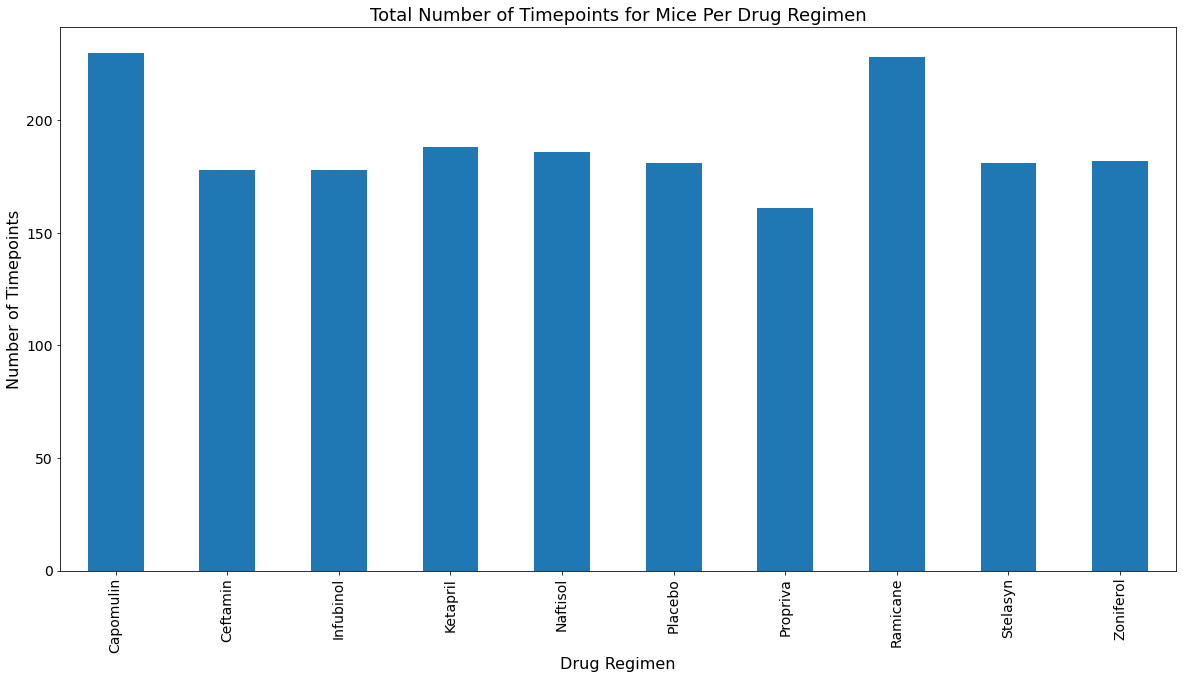

In [99]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
tot_timepoints = mouse_study.groupby(["Drug Regimen"]).count()["Timepoint"]

pandas_plot = tot_timepoints.plot.bar(figsize=(20,10), fontsize=14)
tot_timepoints
plt.title("Total Number of Timepoints for Mice Per Drug Regimen", fontsize=18)
plt.xlabel("Drug Regimen", fontsize= 16)
plt.ylabel("Number of Timepoints", fontsize=16)

plt.show()

Text(0, 0.5, 'Number of Timepoints')

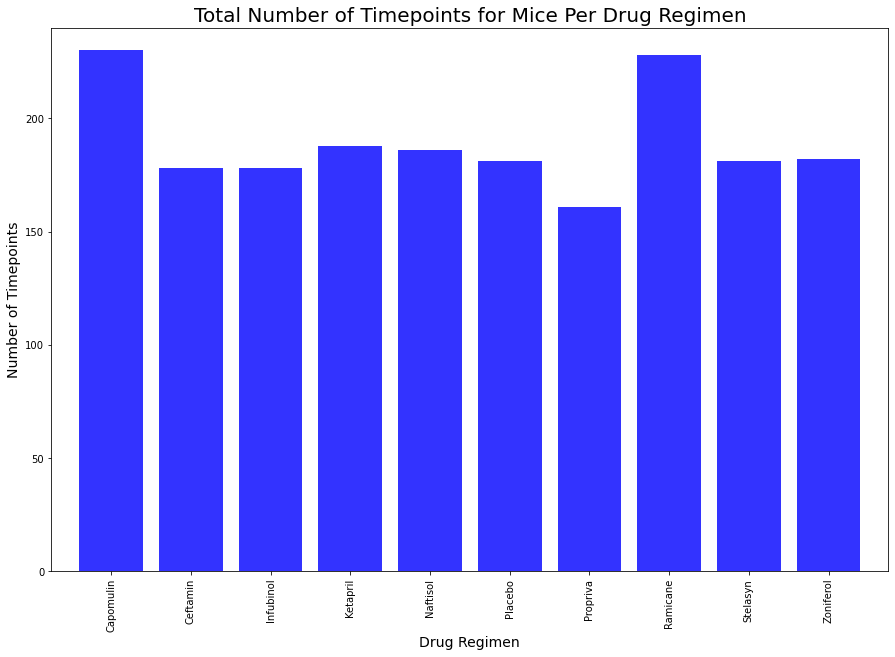

In [102]:
 # Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

# drug_names = [mouse_study["Drug Regimen"].unique()]
# x_axis= np.arange(len(drug_names))
# fig1, ax1 = plt.subplots(figsize=(15,10))
# plt.bar(x_axis, tot_timepoints, color="b", alpha=0.5, align="center")
    
# tick_locations = [value for value in x_axis]
# plt.xticks(tick_locations, [drug_names])
Timepoint_list =(mouse_study.groupby(["Drug Regimen"])["Timepoint"].count()).tolist()

x_axis = np.arange(len(tot_timepoints))
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.bar(x_axis, Timepoint_list, color='b', alpha=0.8, align='center')

tick_locations = [value for value in x_axis]

plt.xticks(tick_locations, ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],  rotation='vertical')

plt.xlim(-0.75, len(x_axis)-0.25)

plt.ylim(0, max(Timepoint_list)+10)

plt.title("Total Number of Timepoints for Mice Per Drug Regimen",fontsize = 20)
plt.xlabel("Drug Regimen",fontsize = 14)
plt.ylabel("Number of Timepoints",fontsize = 14)



In [93]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [94]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [14]:
 # Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

In [18]:
 # Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen